# Parkinson's Disease Prediction

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [3]:
data=pd.read_csv('parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [4]:
data.shape

(195, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


### Data Cleaning

In [7]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
data.duplicated().sum()

0

There is no null values and duplicated values

In [9]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Status is our target column

The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

### Univariate analysis

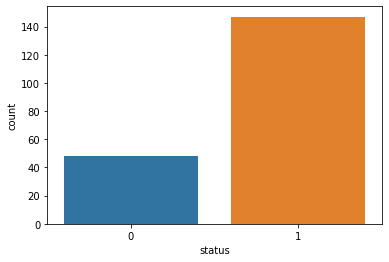

In [10]:
sns.countplot(data=data, x="status")
plt.show()
# patients with PD is more than healthy persons

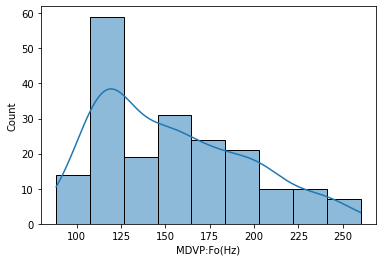

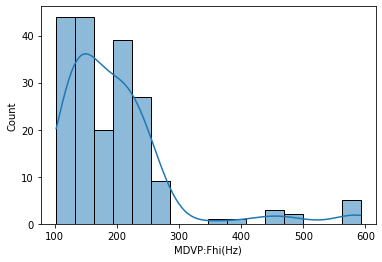

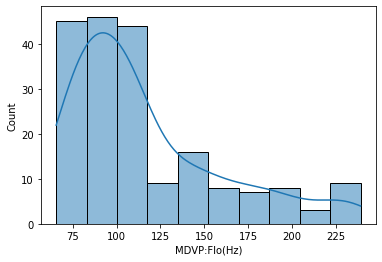

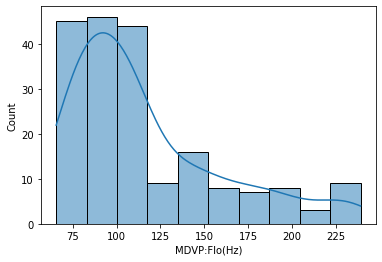

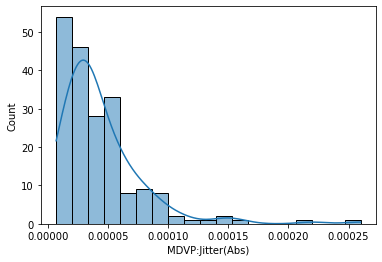

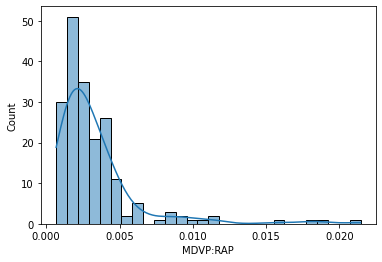

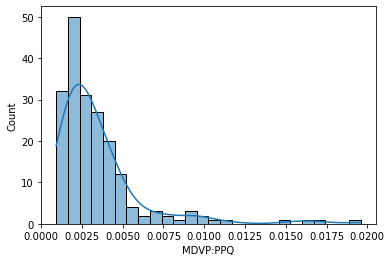

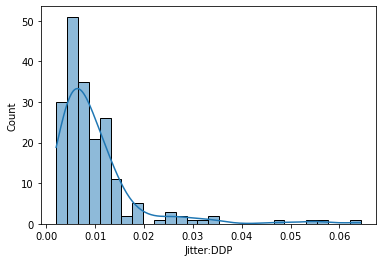

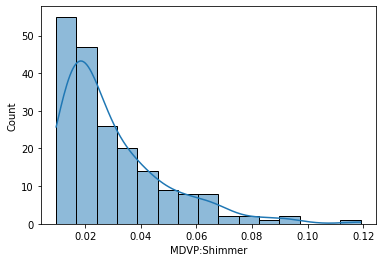

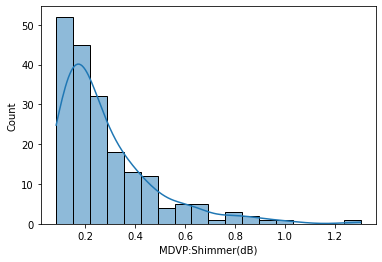

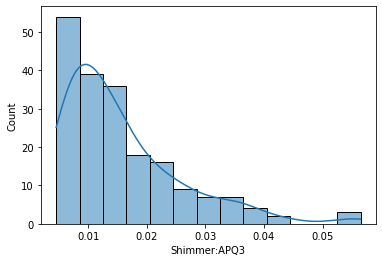

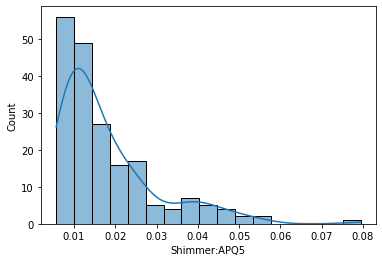

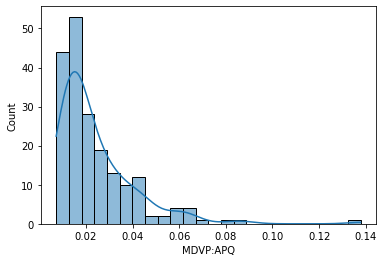

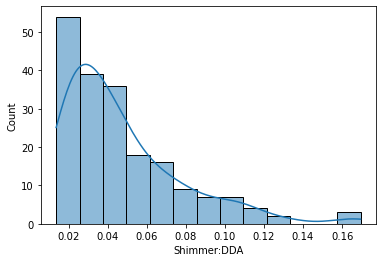

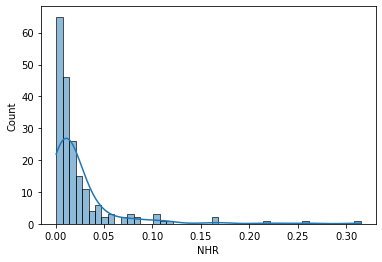

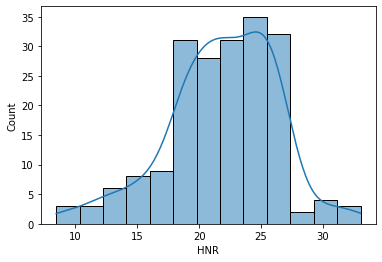

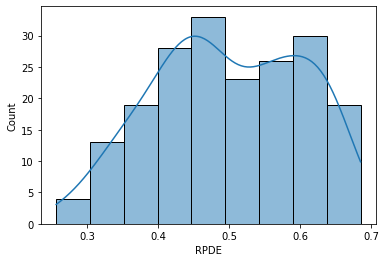

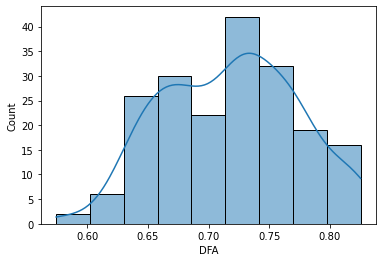

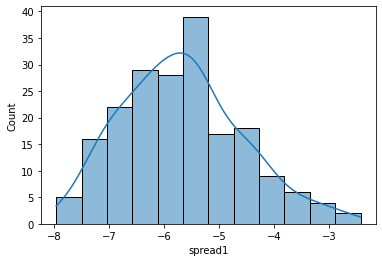

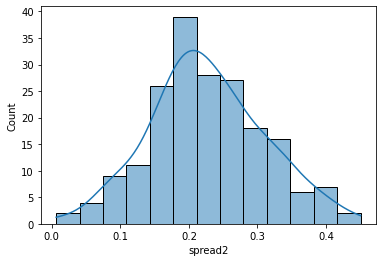

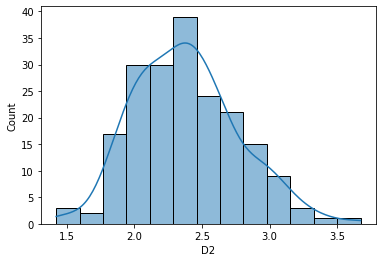

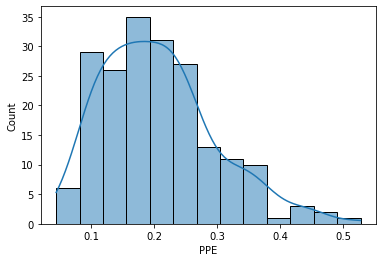

In [11]:
univariate_list = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for i in univariate_list:
    sns.histplot(data[i], kde=True)
    plt.show()
# Majority of the features are positively skewed. There may be outliers

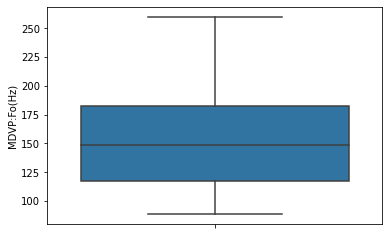

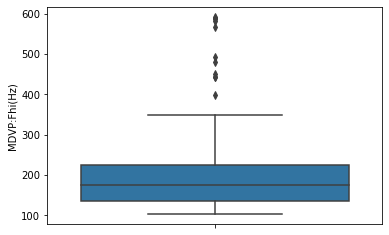

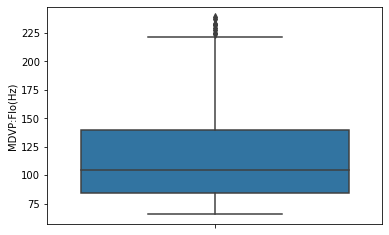

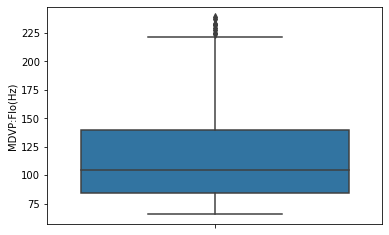

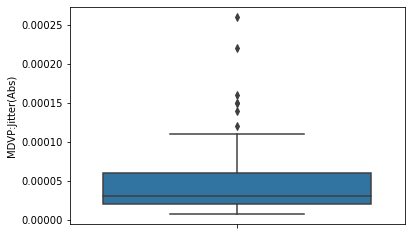

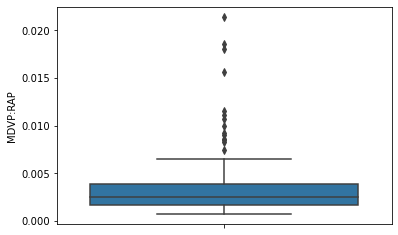

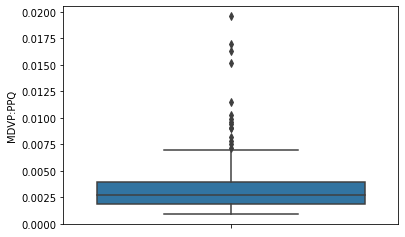

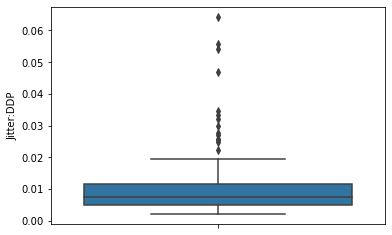

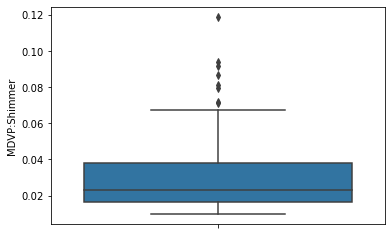

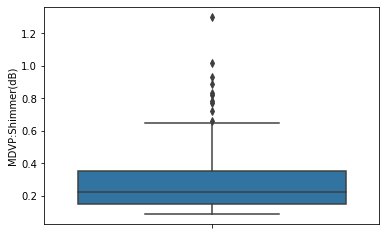

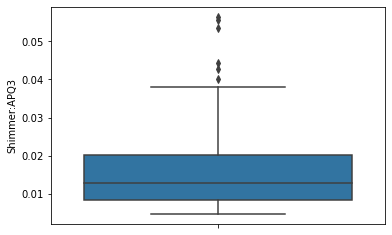

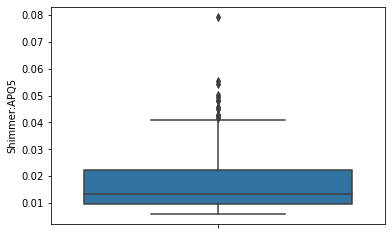

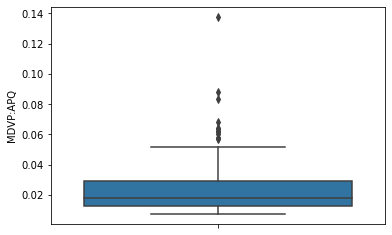

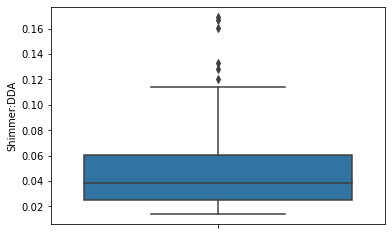

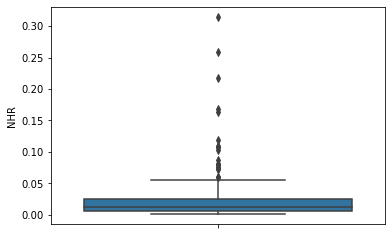

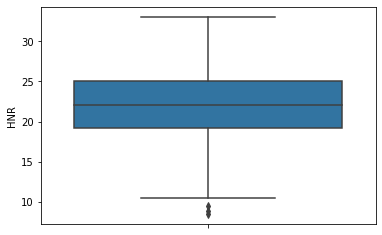

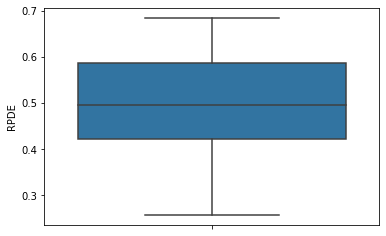

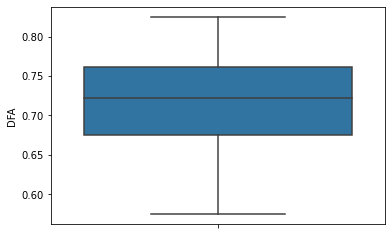

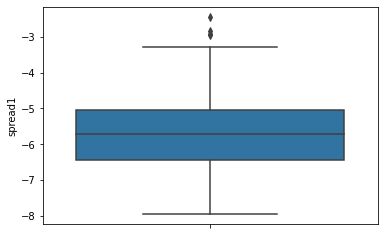

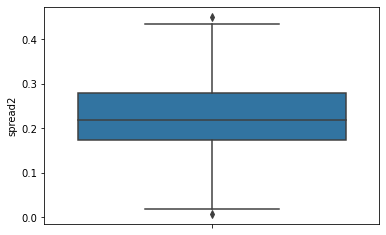

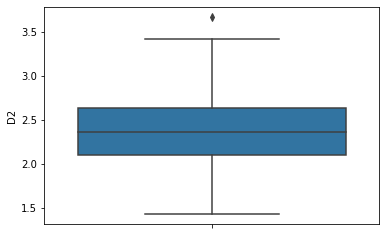

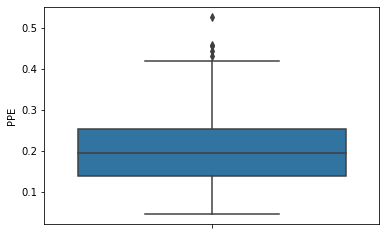

In [12]:
for i in univariate_list:
    sns.boxplot(y = data[i])
    plt.show()
# All of the features having ouliers except MDVP:Fo(Hz), RPDE, DFA, columns

### Multivariate Analysis

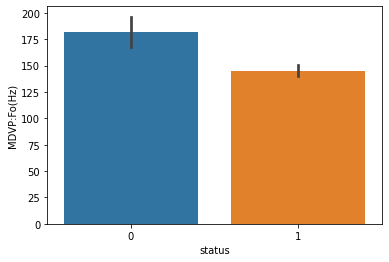

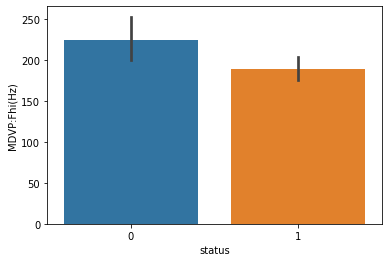

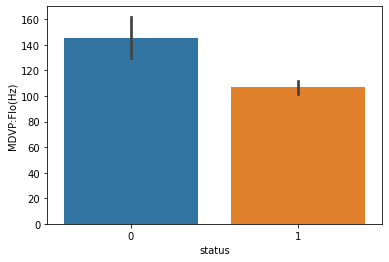

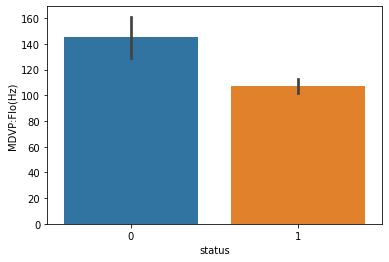

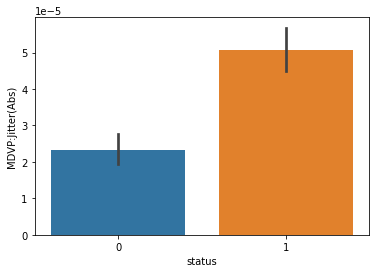

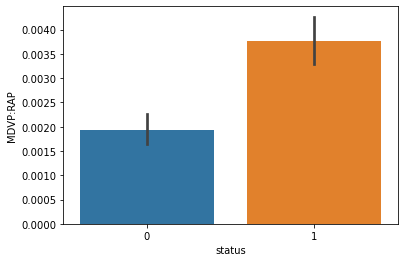

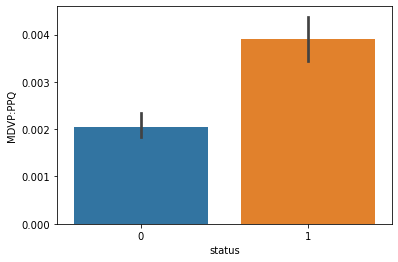

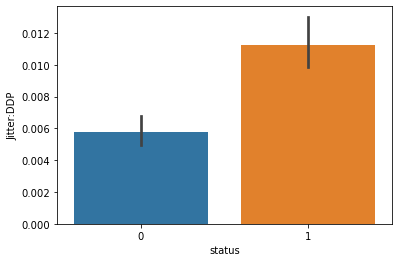

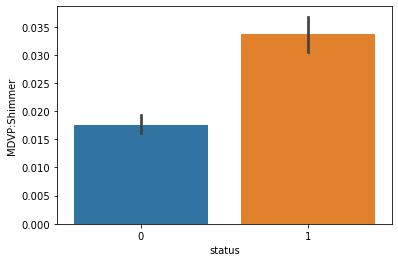

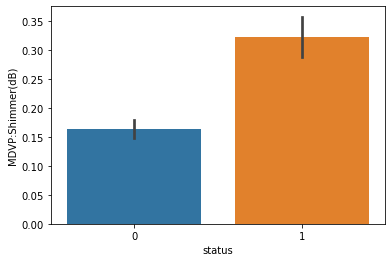

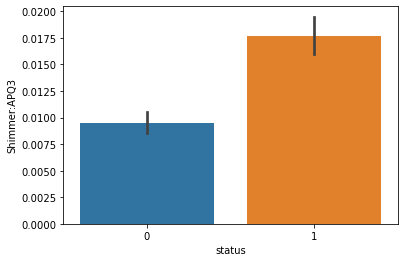

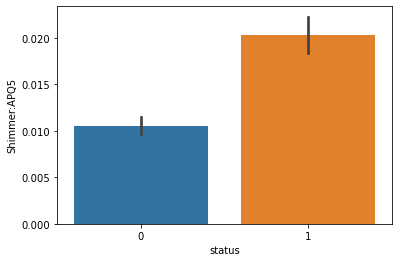

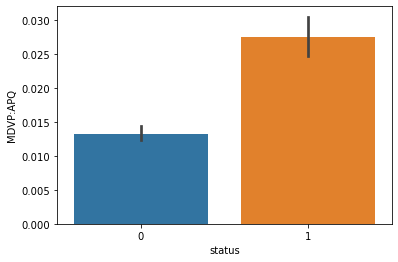

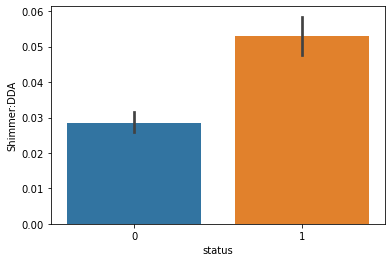

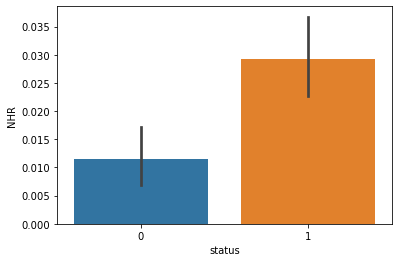

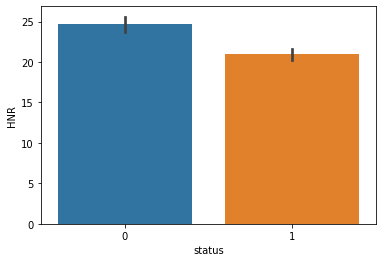

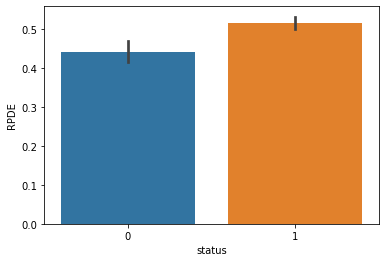

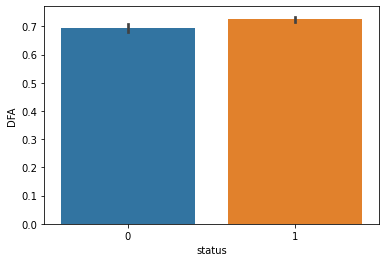

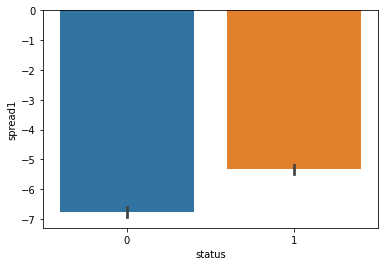

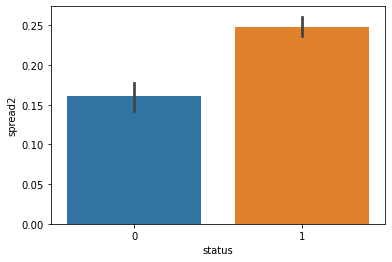

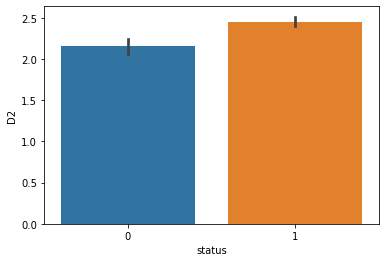

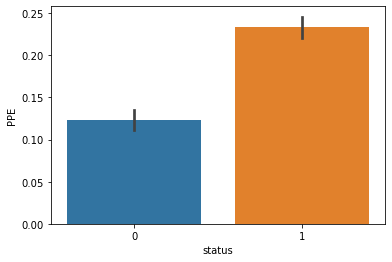

In [13]:
for i in univariate_list:
    sns.barplot(data=data, x='status', y=data[i])
    plt.show()
# Min, Avg, Max freequencies are low for PD patients
# Several measures of variation in fundamental frequency for PD patients is high
# NHR more for PD
# HNR low for PD
# RDPE more for PD
# DFA almost same
# Spread1 and Spread2 are more for PD
# D2 and PPE are more for PD

In [14]:
# Rearrange columns
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'status']]

### Splitting data into input and output variables

In [15]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [16]:
print(X), print(y)

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


(None, None)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

### Splitting data in to Training set and Test set

In [18]:
from sklearn.model_selection import train_test_spli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 22), (39, 22), (156,), (39,))

### Model building

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

In [21]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Tree Classifier" : RandomForestClassifier(),
    "K-Neigbhours Classifer" : KNeighborsClassifier(),
    "SVC" : SVC()
}

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print("The Model trained with {}".format(name))
    train_score = accuracy_score(y_train, model.predict(X_train))
    print("The Model Accuracy of Training set : ", train_score)
    test_score = accuracy_score(y_test, model.predict(X_test))
    print("The Model Accuracy of Test set : ", test_score)
    train_cm = confusion_matrix(y_train, model.predict(X_train))
    print("The Confusion matrix of the Training set : ", train_cm)
    test_cm = confusion_matrix(y_test, model.predict(X_test))
    print("The Confusion matrix of the Test set : ", test_cm)
    print("Wrong Predictions made:",(y_test !=model.predict(X_test)).sum(),'/',((y_test == model.predict(X_test)).sum()+(y_test != model.predict(X_test)).sum()))
    print("-"*100)

The Model trained with Logistic Regression
The Model Accuracy of Training set :  0.8653846153846154
The Model Accuracy of Test set :  0.8974358974358975
The Confusion matrix of the Training set :  [[ 23  15]
 [  6 112]]
The Confusion matrix of the Test set :  [[ 7  3]
 [ 1 28]]
Wrong Predictions made: 4 / 39
----------------------------------------------------------------------------------------------------
The Model trained with Decision Tree Classifier
The Model Accuracy of Training set :  1.0
The Model Accuracy of Test set :  0.8974358974358975
The Confusion matrix of the Training set :  [[ 38   0]
 [  0 118]]
The Confusion matrix of the Test set :  [[ 8  2]
 [ 2 27]]
Wrong Predictions made: 4 / 39
----------------------------------------------------------------------------------------------------
The Model trained with Random Tree Classifier
The Model Accuracy of Training set :  1.0
The Model Accuracy of Test set :  0.9487179487179487
The Confusion matrix of the Training set :  [[ 

### The best model is KNeighbours Classifiers

### Hyper parameters tuning with GridsearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [25]:
gs_fit = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)

In [26]:
gs_fit = gs_fit.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [27]:
### Best Paramters
gs_fit.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}

In [28]:
### Best Score
gs_fit.best_score_

0.8525641025641025

In [29]:
### Using best parameters
best = KNeighborsClassifier(n_neighbors=7, weights = 'distance', metric = 'minkowski')
best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [30]:
best_train = best.predict(X_train)
best_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int64)

In [31]:
best_pred = best.predict(X_test)
best_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, best_train))
print('Test set accuracy: ', metrics.accuracy_score(y_test, best_pred))
print('The Confusion matrix is: ', confusion_matrix(y_test, best_pred))

Training set accuracy:  1.0
Test set accuracy:  0.8974358974358975
The Confusion matrix is:  [[ 7  3]
 [ 1 28]]


In [43]:
print("Number of Wrong Predictions are:",(y_test!=gs_fit.predict(X_test)).sum(),'/',((y_test==gs_fit.predict(X_test)).sum()+(y_test!=gs_fit.predict(X_test)).sum()))

Number of Wrong Predictions are: 4 / 39


In [70]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(best, X, y, cv=5)
score

array([0.76923077, 0.74358974, 0.82051282, 0.64102564, 0.71794872])

In [71]:
### New score is
print('The Accuracy of tuned model is: ', np.mean(score))

The Accuracy of tuned model is:  0.7384615384615384


In [67]:
Pred_vs_Act = pd.DataFrame({'Predicted':best_pred, 'Actual':y_test})
Pred_vs_Act.replace({1:"PD", 0:"Healthy"}, inplace=True)
Pred_vs_Act

,Predicted,Actual
0,PD,PD
1,PD,PD
2,Healthy,Healthy
3,PD,PD
4,PD,Healthy
5,PD,PD
6,PD,PD
7,PD,PD
8,PD,PD
9,PD,PD
